In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Debernardi et al 2020 data.csv')
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [ ]:
df.isna().sum()

,0
sample_id,0
patient_cohort,0
sample_origin,0
age,0
sex,0
diagnosis,0
stage,391
benign_sample_diagnosis,382
plasma_CA19_9,240
creatinine,0


In [ ]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [ ]:
df['stage']=df['stage'].fillna(0)

In [ ]:
df.tail()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN
589,S590,Cohort1,BPTB,74,M,3,IV,NaN,1488.0,1.50423,8.200958,411.938275,2021.321078,13200.0


In [ ]:
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['patient_cohort'] = le.fit_transform(df['patient_cohort'])
df['sample_origin'] = le.fit_transform(df['sample_origin'])
#df['stage'] = le.fit_transform(df['stage'])
df['stage'] = df['stage'].replace('I',1)
df['stage'] = df['stage'].replace('II',2)
df['stage'] = df['stage'].replace('III',3)
df['stage'] = df['stage'].replace('IV',4)

df['REG1A']=df['REG1A'].fillna(df['REG1A'].mean())
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())
df.tail(399)

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
191,S260,1,0,55,0,2,0,Cholecystitis,654.002944,0.67860,0.604511,11.941000,72.624000,735.281222
192,S261,1,0,74,0,2,0,Cholecystitis,654.002944,0.75777,0.222569,18.828000,133.222000,735.281222
193,S263,1,0,71,0,2,0,Cholecystitis,654.002944,1.36851,0.728665,14.704000,200.093000,735.281222
194,S274,1,0,52,0,2,0,Cholecystitis,654.002944,0.19227,0.127130,36.126000,7.562000,735.281222
195,S275,1,0,37,0,2,0,Cholecystitis,9.000000,0.97266,3.669337,45.618000,179.403000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,1,0,68,1,3,4,NaN,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,S558,1,0,71,0,3,4,NaN,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,S560,1,0,63,1,3,4,NaN,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,S583,1,0,75,0,3,4,NaN,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222


In [ ]:
df.describe()

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.437288,0.598305,59.079661,0.493220,2.027119,0.847458,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,0.496473,0.944826,13.109520,0.500378,0.804873,1.274186,1870.760130,0.639028,3.438796,196.267110,1010.477245,1063.030198
min,0.000000,0.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,0.000000,0.000000,50.000000,0.000000,1.000000,0.000000,17.000000,0.373230,0.167179,10.757216,43.961000,195.201000
50%,0.000000,0.000000,60.000000,0.000000,2.000000,0.000000,654.002944,0.723840,1.649862,34.303353,259.873974,735.281222
75%,1.000000,2.000000,69.000000,1.000000,3.000000,2.000000,654.002944,1.139482,5.205037,122.741013,742.736000,735.281222
max,1.000000,3.000000,89.000000,1.000000,3.000000,4.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [ ]:
df['diagnosis'] = df['diagnosis'].replace(1,0)
df['diagnosis'] = df['diagnosis'].replace(2,0)
df['diagnosis'] = df['diagnosis'].replace(3,1)

df.drop('sample_id',axis=1,inplace=True)
df.drop('benign_sample_diagnosis',axis=1,inplace=True)

#df['stage'] = df['stage'].replace(4,0)
#df['stage'] = df['stage'].replace(0,1)
#df['stage'] = df['stage'].replace(1,2)
#df['stage'] = df['stage'].replace(2,3)
#df['stage'] = df['stage'].replace(3,4)

#df.loc[df['diagnosis'] == 0, 'stage'] = '0'

df.corr()

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
patient_cohort,1.000000e+00,-0.515269,-0.100835,-0.227245,-0.361497,-0.366731,-0.128432,-0.225134,-0.401192,-0.131202,-0.203987,8.777388e-18
sample_origin,-5.152687e-01,1.000000,0.154326,0.125307,0.341540,0.274786,0.081689,0.128240,0.321765,0.083937,0.239808,-1.205917e-01
age,-1.008350e-01,0.154326,1.000000,0.024023,0.386771,0.357384,0.109214,-0.069393,0.329805,0.204317,0.207868,4.161237e-02
sex,-2.272447e-01,0.125307,0.024023,1.000000,0.127989,0.142171,0.056530,0.180059,0.177008,0.157579,0.114623,8.305093e-02
diagnosis,-3.614971e-01,0.341540,0.386771,0.127989,1.000000,0.933072,0.236526,0.068043,0.565812,0.416673,0.389161,1.904525e-01
stage,-3.667308e-01,0.274786,0.357384,0.142171,0.933072,1.000000,0.239954,0.111326,0.582871,0.421226,0.399761,2.203221e-01
plasma_CA19_9,-1.284323e-01,0.081689,0.109214,0.056530,0.236526,0.239954,1.000000,-0.023064,0.204001,0.134020,0.132608,1.080284e-01
creatinine,-2.251344e-01,0.128240,-0.069393,0.180059,0.068043,0.111326,-0.023064,1.000000,0.338533,0.261906,0.397795,4.563207e-02
LYVE1,-4.011919e-01,0.321765,0.329805,0.177008,0.565812,0.582871,0.204001,0.338533,1.000000,0.543075,0.577363,2.017223e-01
REG1B,-1.312018e-01,0.083937,0.204317,0.157579,0.416673,0.421226,0.134020,0.261906,0.543075,1.000000,0.690228,3.472052e-01


In [ ]:
df.describe()

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.437288,0.598305,59.079661,0.493220,0.337288,0.847458,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,0.496473,0.944826,13.109520,0.500378,0.473185,1.274186,1870.760130,0.639028,3.438796,196.267110,1010.477245,1063.030198
min,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,17.000000,0.373230,0.167179,10.757216,43.961000,195.201000
50%,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,654.002944,0.723840,1.649862,34.303353,259.873974,735.281222
75%,1.000000,2.000000,69.000000,1.000000,1.000000,2.000000,654.002944,1.139482,5.205037,122.741013,742.736000,735.281222
max,1.000000,3.000000,89.000000,1.000000,1.000000,4.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [ ]:
fdf = df[['diagnosis','patient_cohort','sample_origin','age','sex','creatinine','LYVE1','REG1B','TFF1','plasma_CA19_9','REG1A']]
fdf.describe()

,diagnosis,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,0.337288,0.437288,0.598305,59.079661,0.493220,0.855383,3.063530,111.774090,597.868722,654.002944,735.281222
std,0.473185,0.496473,0.944826,13.109520,0.500378,0.639028,3.438796,196.267110,1010.477245,1870.760130,1063.030198
min,0.000000,0.000000,0.000000,26.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000,0.000000
25%,0.000000,0.000000,0.000000,50.000000,0.000000,0.373230,0.167179,10.757216,43.961000,17.000000,195.201000
50%,0.000000,0.000000,0.000000,60.000000,0.000000,0.723840,1.649862,34.303353,259.873974,654.002944,735.281222
75%,1.000000,1.000000,2.000000,69.000000,1.000000,1.139482,5.205037,122.741013,742.736000,654.002944,735.281222
max,1.000000,1.000000,3.000000,89.000000,1.000000,4.116840,23.890323,1403.897600,13344.300000,31000.000000,13200.000000


In [ ]:
fdf.tail()

,diagnosis,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
585,1,1,0,68,1,0.52026,7.058209,156.241000,525.178000,654.002944,735.281222
586,1,1,0,71,0,0.85956,8.341207,16.915000,245.947000,654.002944,735.281222
587,1,1,0,63,1,1.36851,7.674707,289.701000,537.286000,654.002944,735.281222
588,1,1,0,75,0,1.33458,8.206777,205.930000,722.523000,654.002944,735.281222
589,1,0,0,74,1,1.50423,8.200958,411.938275,2021.321078,1488.000000,13200.000000


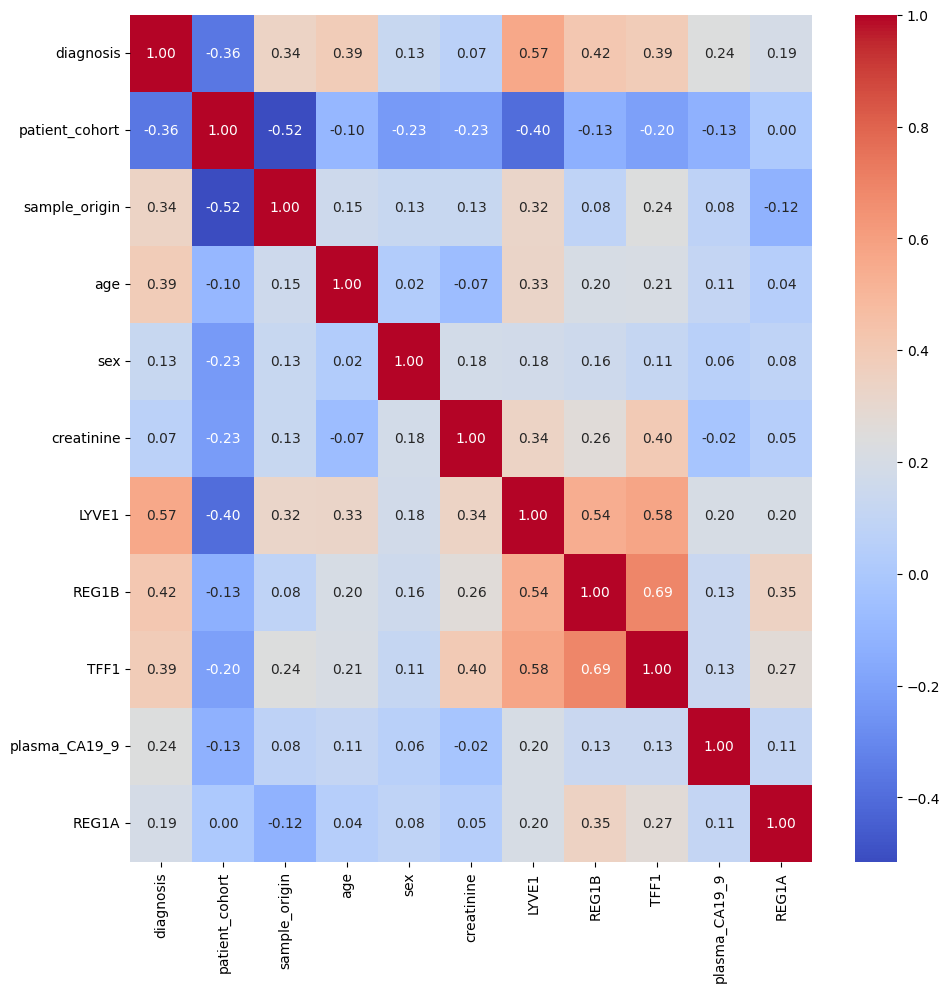

In [ ]:
correlation_matrix = fdf.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

<Axes: xlabel='diagnosis', ylabel='count'>

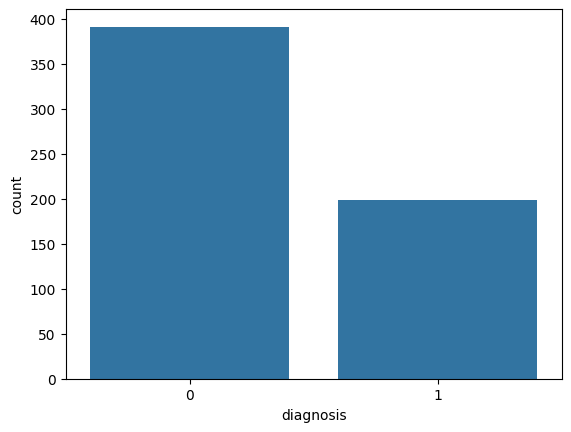

In [ ]:
sns.countplot(data = fdf, x = 'diagnosis')

In [ ]:
pd.crosstab(df.diagnosis,df.stage)

stage,0,1,2,3,4
diagnosis,,,,,
0,391,0,0,0,0
1,0,16,86,76,21


<Axes: xlabel='stage', ylabel='count'>

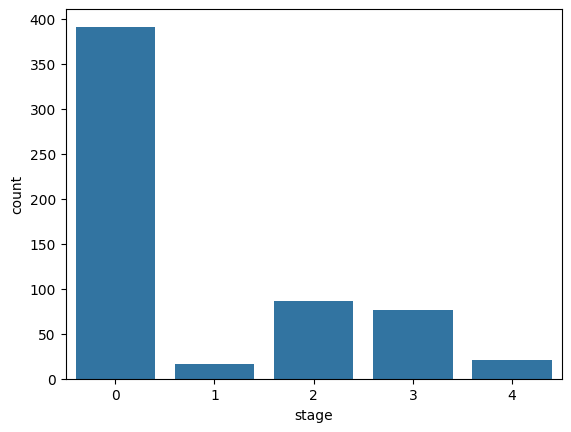

In [ ]:
#fdf_temporary = fdf[fdf['diagnosis']==1]
sns.countplot(data=fdf , x = 'stage')

In [ ]:
pd.crosstab(df.sex,df.diagnosis)

diagnosis,0,1
sex,,
0,216,83
1,175,116


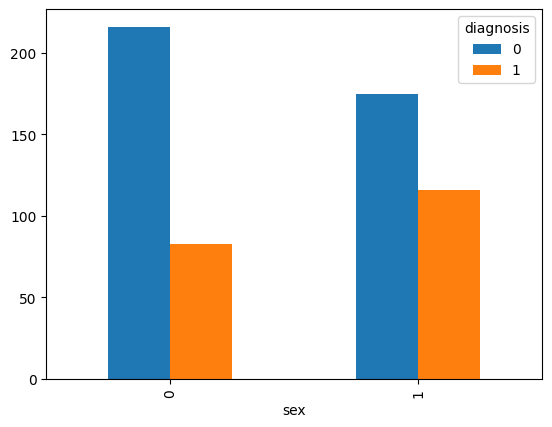

In [ ]:
data = pd.crosstab(df.sex,df.diagnosis)
data.plot(kind='bar',stacked=False)
plt.show()

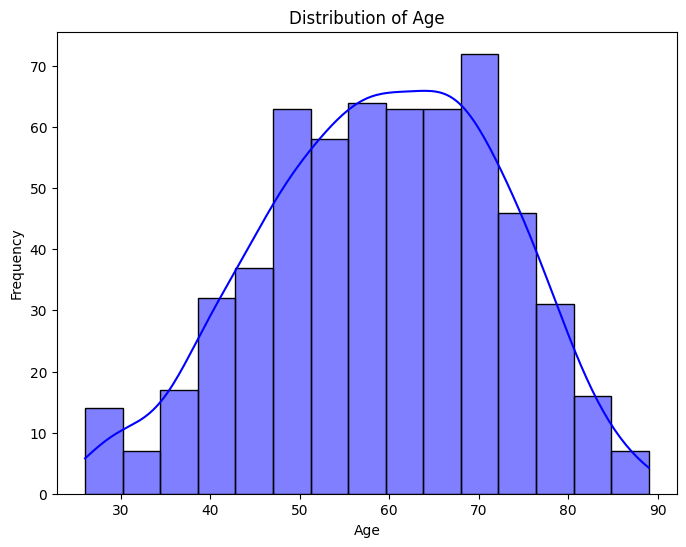

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=15)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

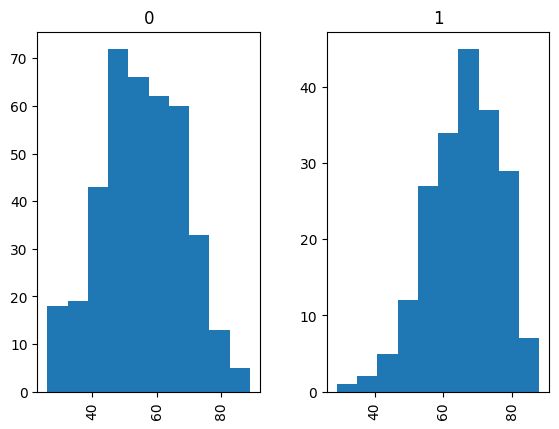

In [ ]:
fdf.hist(column='age' , by = 'diagnosis')
plt.show()

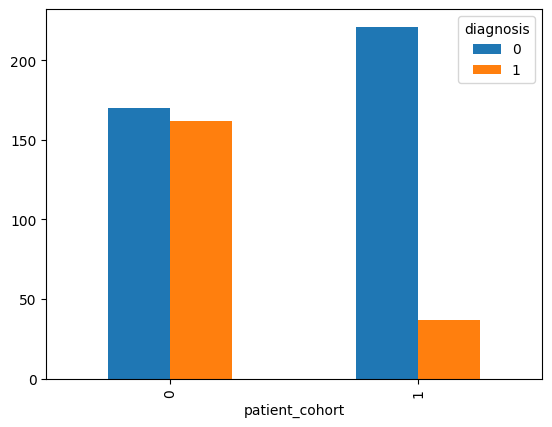

In [ ]:
data = pd.crosstab(df.patient_cohort,df.diagnosis)
data.plot(kind='bar',stacked=False)
plt.show()

Distribution of numerical columns


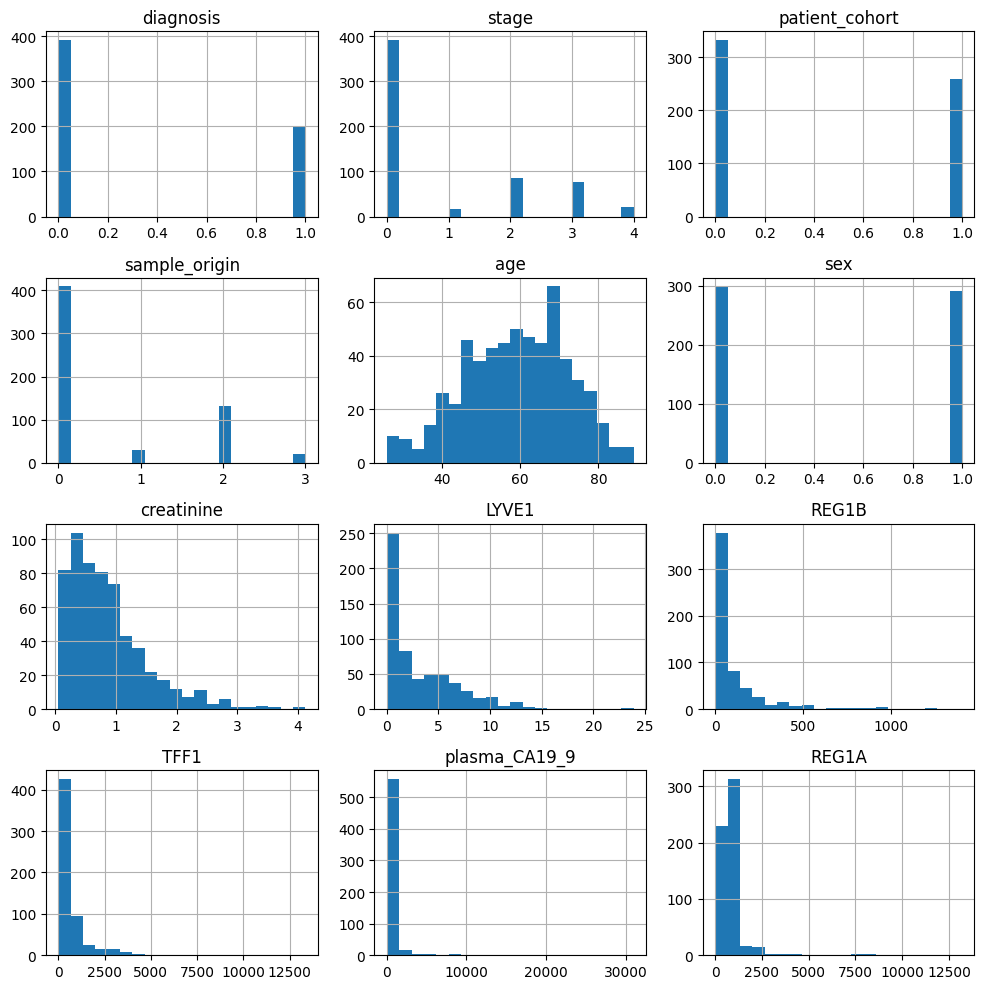

In [ ]:
print("Distribution of numerical columns")
fdf.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

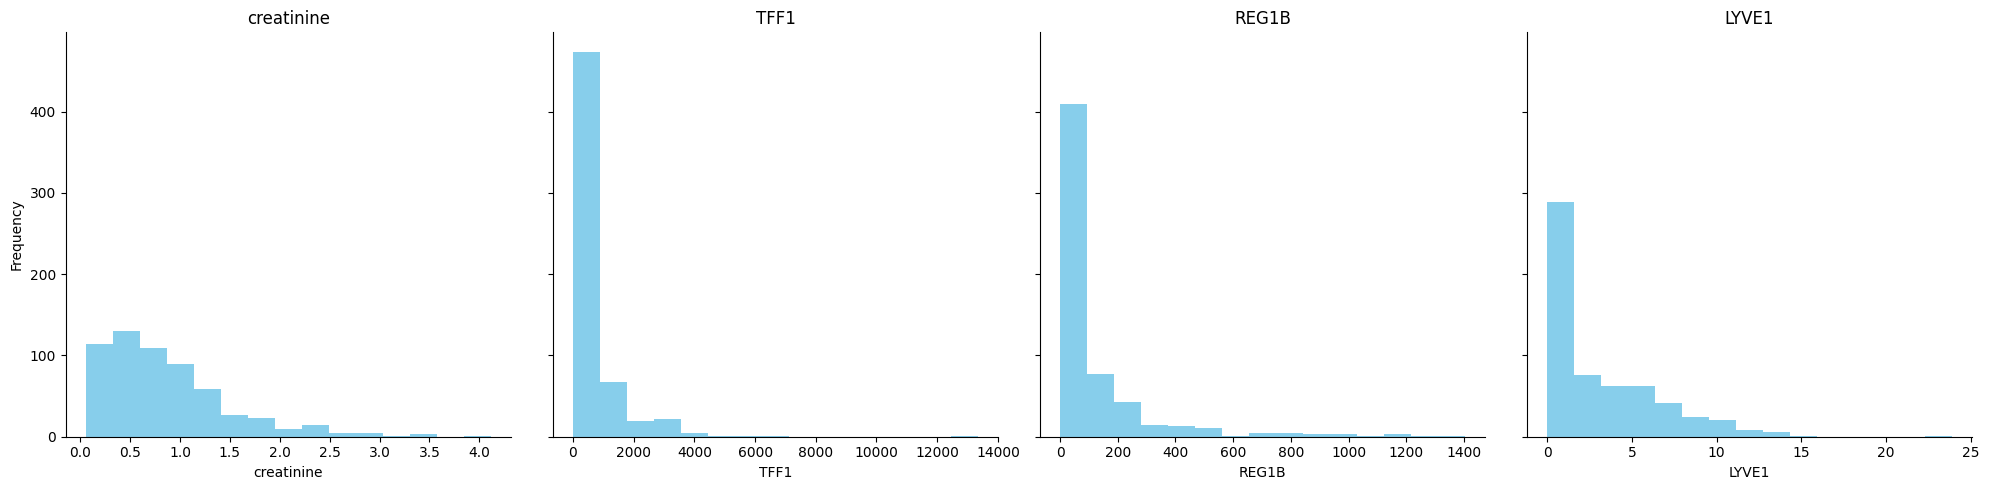

In [ ]:
columns = ['creatinine', 'TFF1', 'REG1B', 'LYVE1']

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=True)

for ax, col in zip(axes, columns):
    df[col].plot(kind='hist', bins=15, ax=ax, title=col, color='skyblue')
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust spacing
plt.tight_layout()
plt.show()

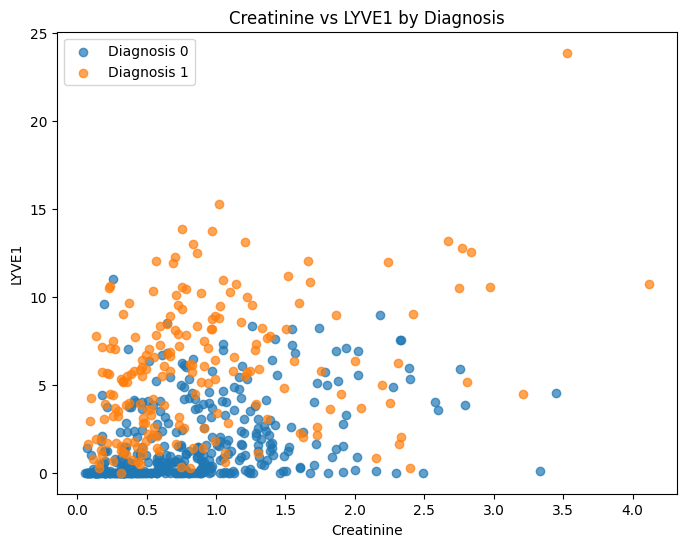

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(fdf[fdf['diagnosis'] == 0]['creatinine'], fdf[fdf['diagnosis'] == 0]['LYVE1'], label='Diagnosis 0', alpha=0.7)
plt.scatter(fdf[fdf['diagnosis'] == 1]['creatinine'], fdf[fdf['diagnosis'] == 1]['LYVE1'], label='Diagnosis 1', alpha=0.7)
plt.title('Creatinine vs LYVE1 by Diagnosis')
plt.xlabel('Creatinine')
plt.ylabel('LYVE1')
_ = plt.legend()

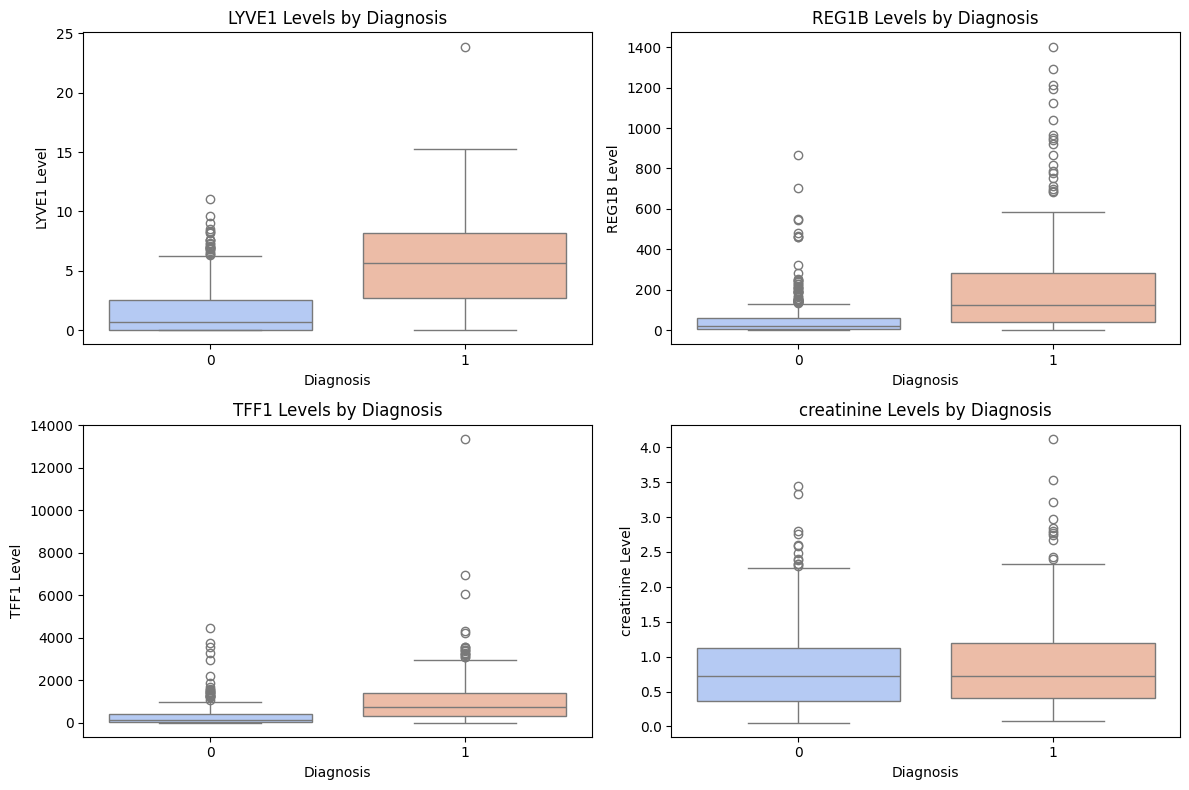

In [ ]:
biomarkers = ['LYVE1', 'REG1B', 'TFF1', 'creatinine']
plt.figure(figsize=(12, 8))
for i, biomarker in enumerate(biomarkers, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='diagnosis', y=biomarker, palette='coolwarm')
    plt.title(f'{biomarker} Levels by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(f'{biomarker} Level')
plt.tight_layout()
plt.show()


Pairplot to see pairwise relationships:


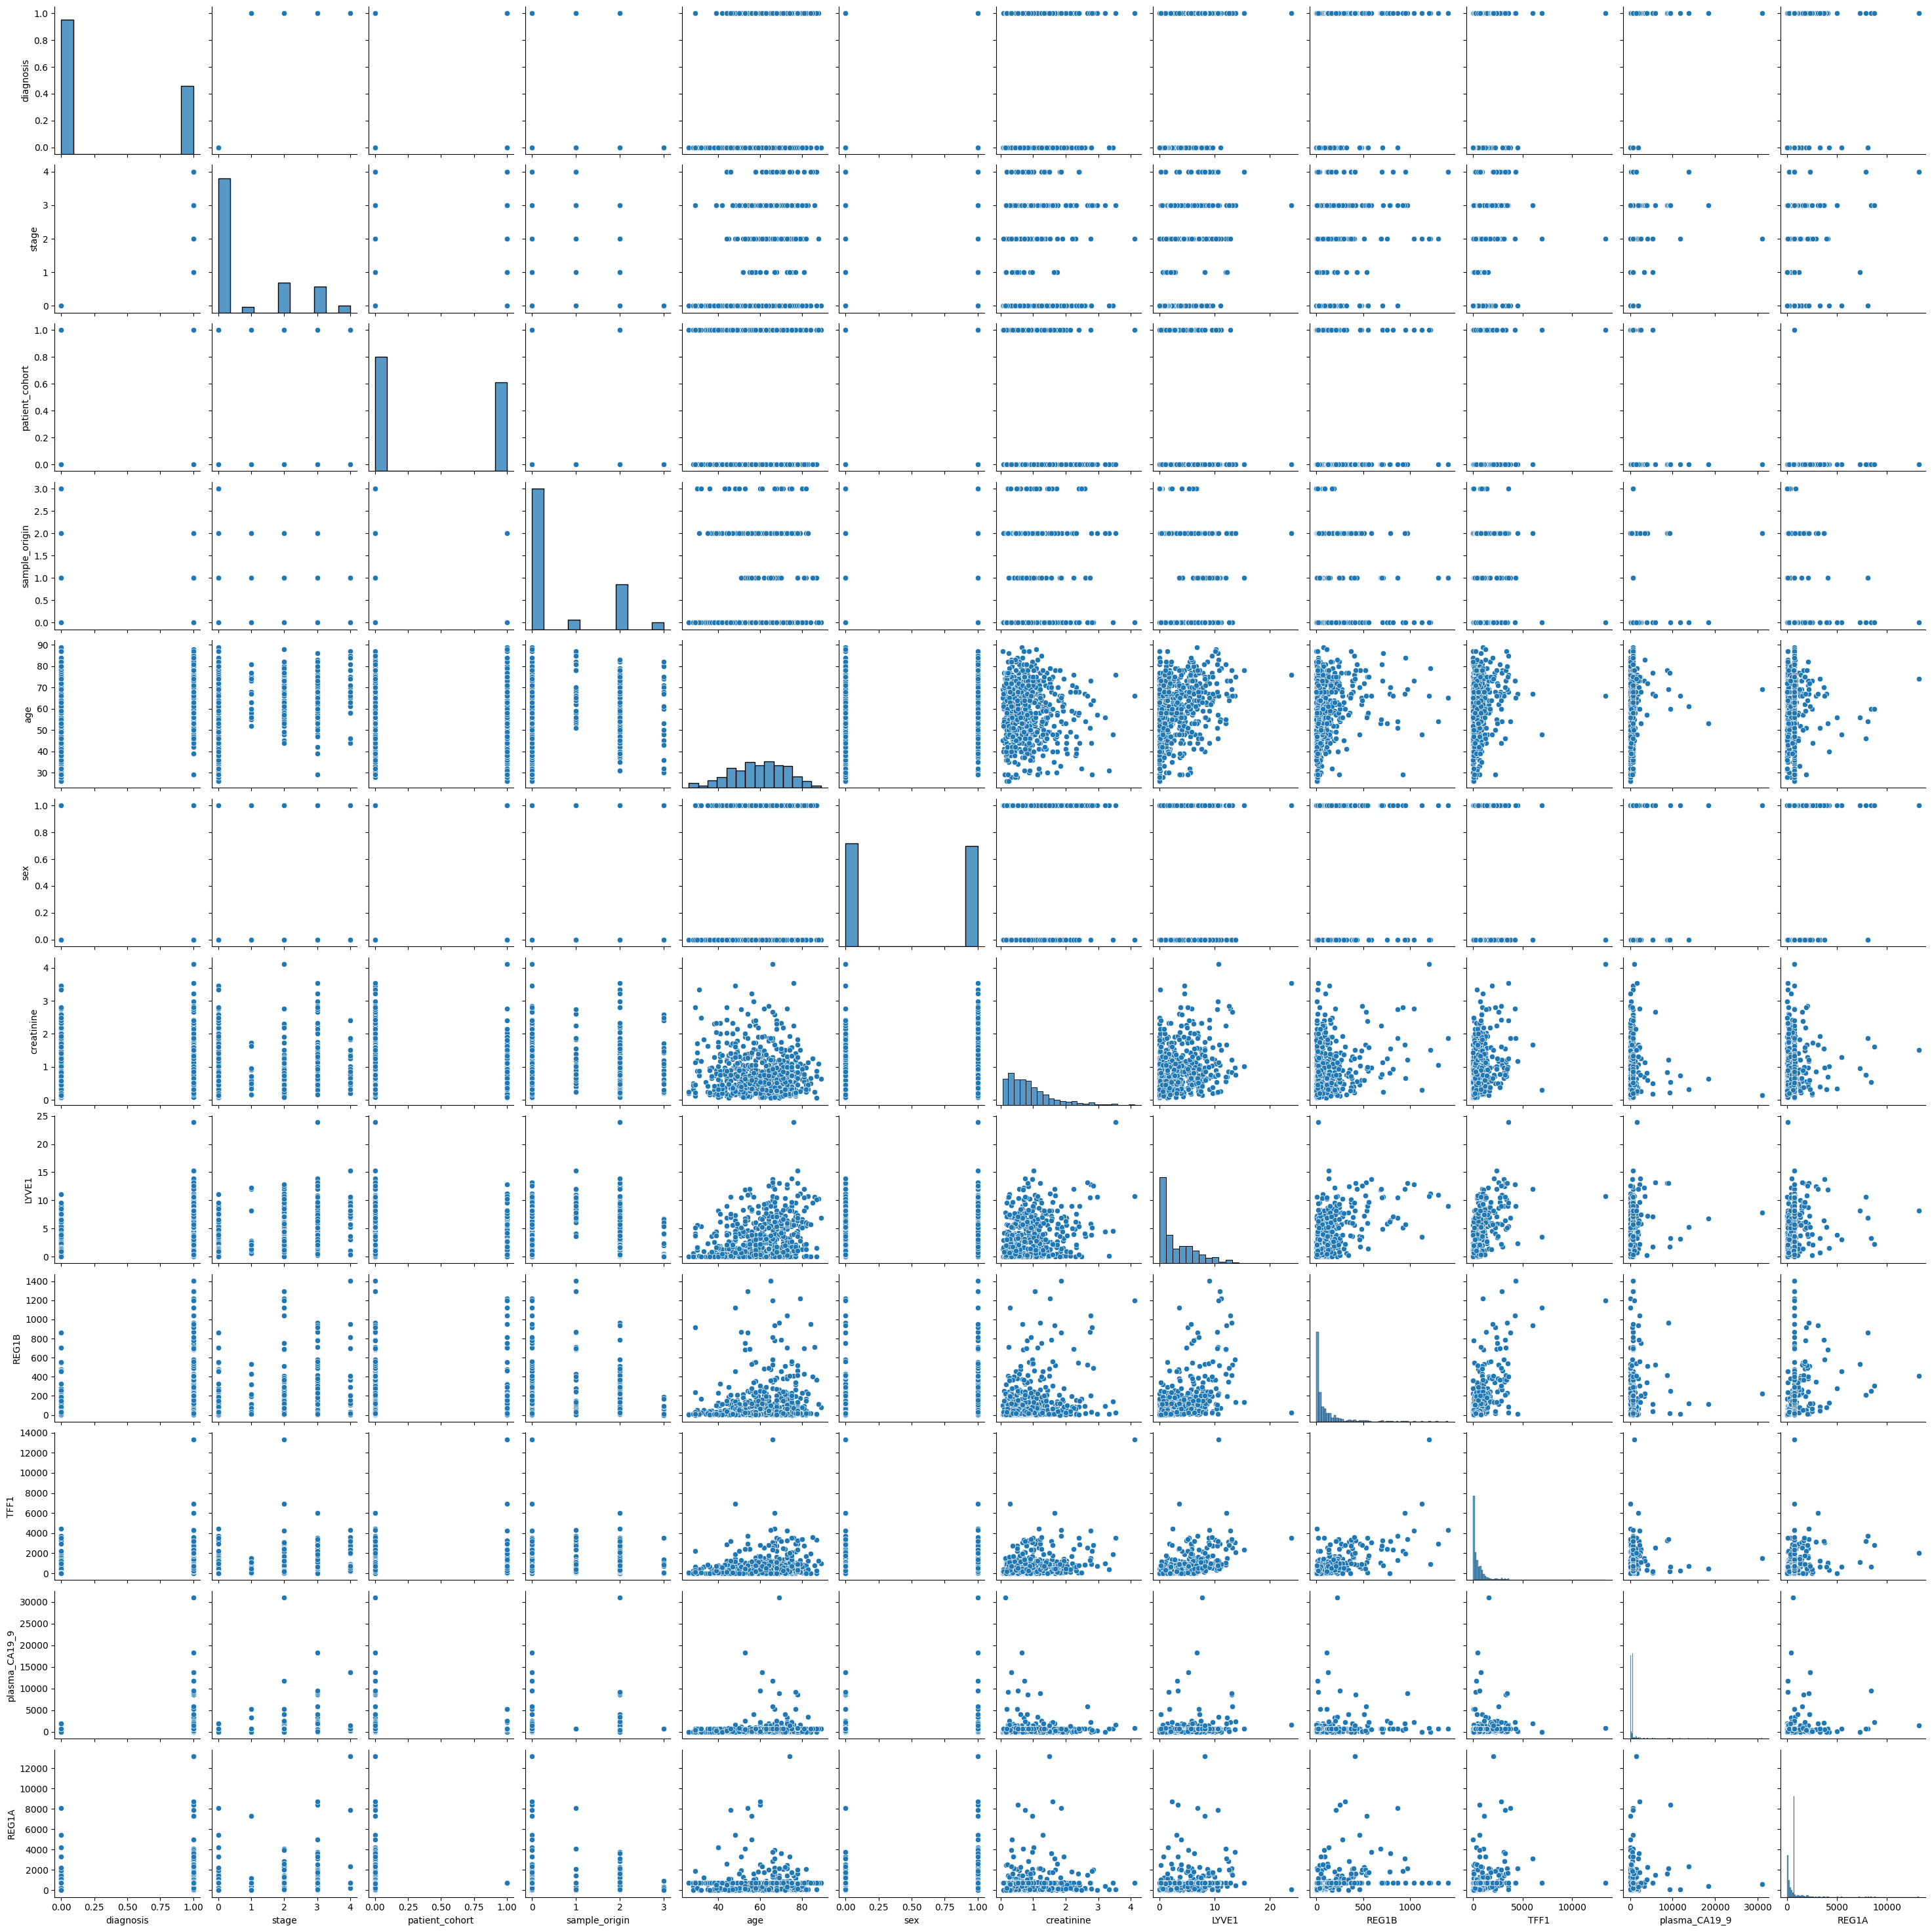

In [ ]:
numeric_df = fdf.select_dtypes(include=['number'])

if 'category_column' in fdf.columns:
    print("\nCount plot for categorical data:")
    sns.countplot(data=fdf, x='category_column')
    plt.show()

# Pairplot to check relationships between features
print("\nPairplot to see pairwise relationships:")
sns.pairplot(fdf)
plt.show()

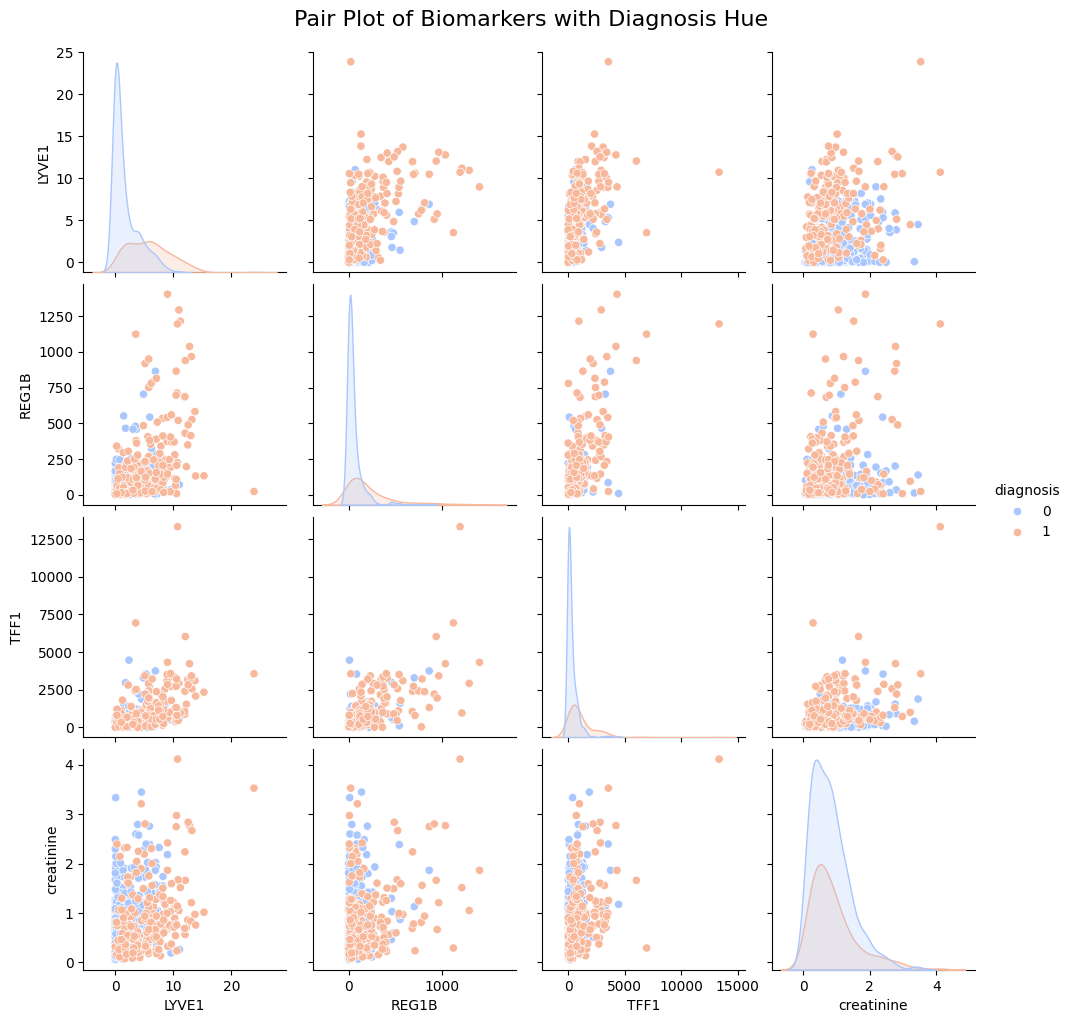

In [ ]:
# Select the biomarkers and add diagnosis for grouping
selected_data = df[['LYVE1', 'REG1B', 'TFF1', 'creatinine', 'diagnosis']]

# Create a pair plot
sns.pairplot(data=selected_data, hue='diagnosis', palette='coolwarm', diag_kind='kde')

# Display the plot
plt.suptitle('Pair Plot of Biomarkers with Diagnosis Hue', y=1.02, fontsize=16)
plt.show()


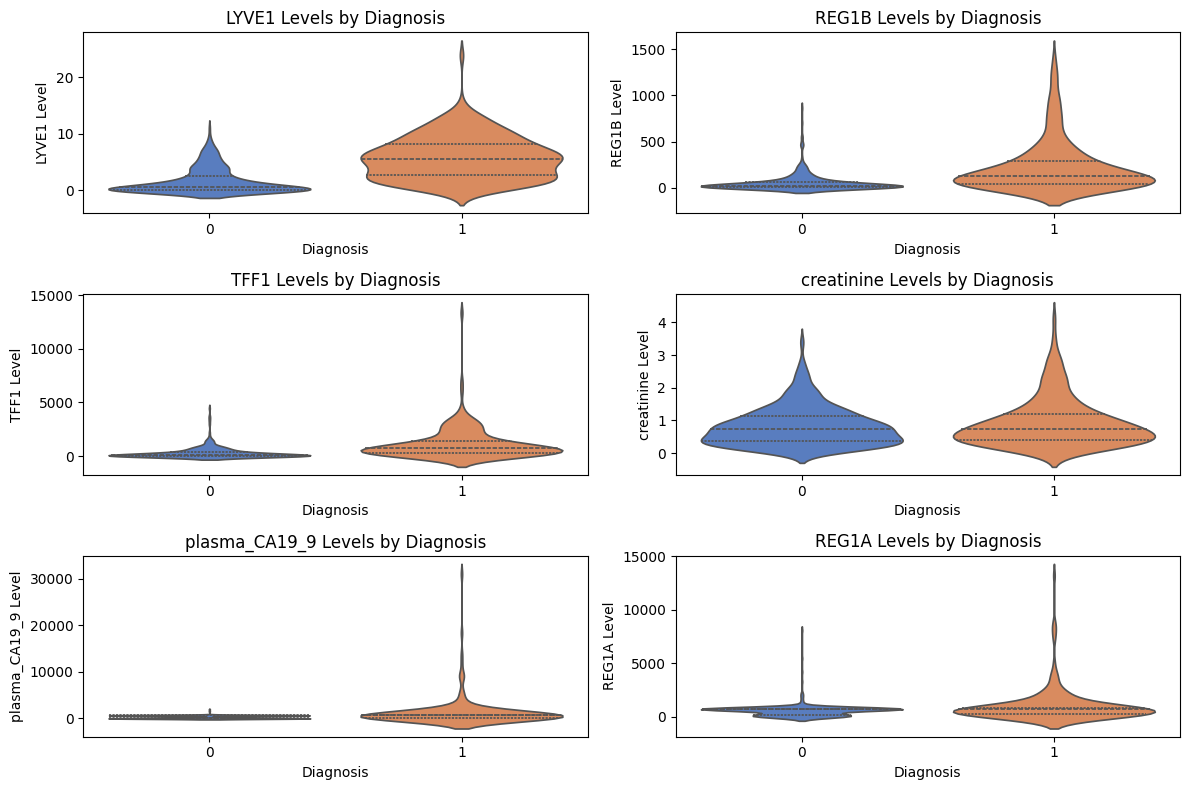

In [ ]:
biomarkers = ['LYVE1', 'REG1B', 'TFF1', 'creatinine','plasma_CA19_9','REG1A']
plt.figure(figsize=(12, 8))
for i, biomarker in enumerate(biomarkers, start=1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=df, x='diagnosis', y=biomarker, palette='muted', inner='quartile')
    plt.title(f'{biomarker} Levels by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(f'{biomarker} Level')
plt.tight_layout()
plt.show()

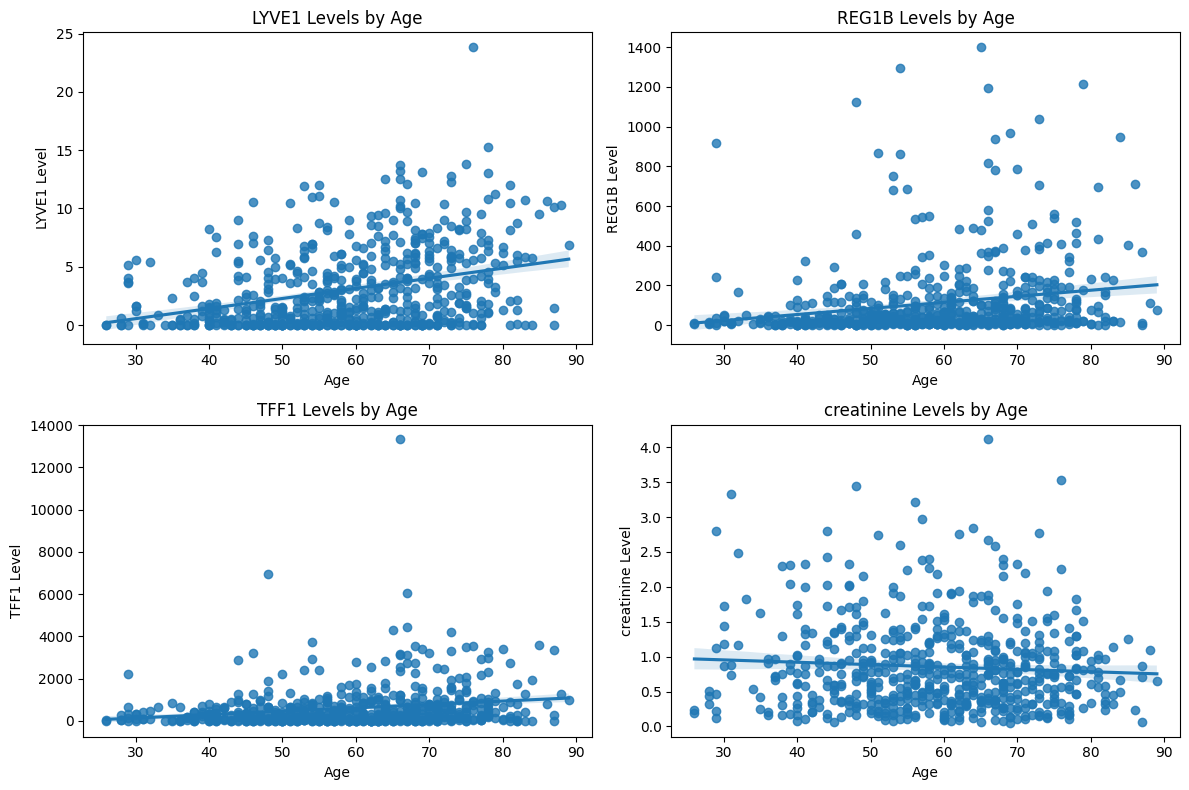

In [ ]:
biomarkers = ['LYVE1', 'REG1B', 'TFF1', 'creatinine']
plt.figure(figsize=(12, 8))
for i, biomarker in enumerate(biomarkers, start=1):
    plt.subplot(2, 2, i)
    sns.regplot(data=df, x='age', y=biomarker)
    plt.title(f'{biomarker} Levels by Age')
    plt.xlabel('Age')
    plt.ylabel(f'{biomarker} Level')
plt.tight_layout()
plt.show()

In [ ]:
fdf_temporary2 = fdf[['diagnosis','age','LYVE1','REG1B','TFF1']]
fdf_temporary2.corr()

,diagnosis,age,LYVE1,REG1B,TFF1
diagnosis,1.000000,0.386771,0.565812,0.416673,0.389161
age,0.386771,1.000000,0.329805,0.204317,0.207868
LYVE1,0.565812,0.329805,1.000000,0.543075,0.577363
REG1B,0.416673,0.204317,0.543075,1.000000,0.690228
TFF1,0.389161,0.207868,0.577363,0.690228,1.000000


In [ ]:
random2 = fdf[['diagnosis','age','creatinine','LYVE1','REG1B','TFF1']]
groups = random2.groupby('diagnosis').mean()
groups.style.highlight_max(color='red')

,age,creatinine,LYVE1,REG1B,TFF1
diagnosis,,,,,
0,55.465473,0.824389,1.676618,53.481596,317.567397
1,66.180905,0.916281,5.788567,226.308587,1148.611527


In [ ]:
random3 = fdf[['diagnosis','stage','age','creatinine','LYVE1','REG1B','TFF1']]
groups2 = random3.groupby('stage').mean()
groups2.drop(columns = 'diagnosis').style.highlight_max(color='red')

,age,creatinine,LYVE1,REG1B,TFF1
stage,,,,,
0,55.465473,0.824389,1.676618,53.481596,317.567397
1,66.750000,0.662342,3.433940,139.968663,539.974592
2,67.279070,0.783678,5.397179,224.886484,1170.003243
3,63.789474,1.074896,6.296259,221.185408,1118.929278
4,69.904762,1.078759,7.348032,316.456271,1632.152213


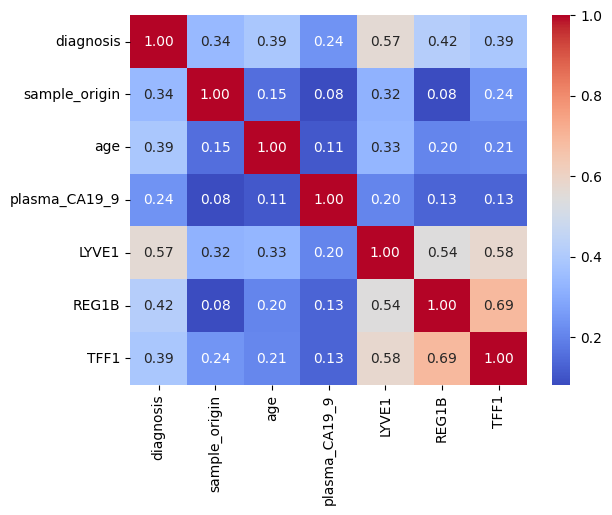

In [ ]:
fdf_diag = fdf[['diagnosis','sample_origin','age','plasma_CA19_9','LYVE1','REG1B','TFF1']]

correlation_matrix = fdf_diag.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [ ]:
fdf_diag.head()

,diagnosis,sample_origin,age,plasma_CA19_9,LYVE1,REG1B,TFF1
0,0,0,33,11.700000,0.893219,52.94884,654.282174
1,0,0,81,654.002944,2.037585,94.46703,209.488250
2,0,0,51,7.000000,0.145589,102.36600,461.141000
3,0,0,61,8.000000,0.002805,60.57900,142.950000
4,0,0,62,9.000000,0.000860,65.54000,41.088000


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.6 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

x_diag = fdf_diag.drop('diagnosis', axis=1)
y_diag = fdf_diag['diagnosis']

smote = SMOTE(random_state=42)
x_diag_resampled, y_diag_resampled = smote.fit_resample(x_diag, y_diag)

print("Original class distribution:", y_diag.value_counts())
print("Resampled class distribution:", pd.Series(y_diag_resampled).value_counts())


Original class distribution: diagnosis
0    391
1    199
Name: count, dtype: int64
Resampled class distribution: diagnosis
0    391
1    391
Name: count, dtype: int64


In [ ]:
x_diag.head()

,sample_origin,age,plasma_CA19_9,LYVE1,REG1B,TFF1
0,0,33,11.700000,0.893219,52.94884,654.282174
1,0,81,654.002944,2.037585,94.46703,209.488250
2,0,51,7.000000,0.145589,102.36600,461.141000
3,0,61,8.000000,0.002805,60.57900,142.950000
4,0,62,9.000000,0.000860,65.54000,41.088000


**DECISION TREE**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)
'''
clf = DecisionTreeClassifier(
    criterion='gini',       # Use Gini Impurity
    max_depth=3,            # Limit tree depth
    min_samples_split=4,    # Minimum samples to split
    min_samples_leaf=2,     # Minimum samples in leaf
    max_features='sqrt',    # Use sqrt of total features
    random_state=42         # For reproducibility
)
'''
dt_model = tree.DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best',max_depth=2)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, dt_model.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, dt_model.predict(X_train))))

y_test_pred = dt_model.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))

import pickle

model_df = "model_cel1_dt.pkl"
with open(model_df, "wb") as file:
    pickle.dump(dt_model, file)



Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       118
           1       0.72      0.69      0.71       117

    accuracy                           0.71       235
   macro avg       0.72      0.71      0.71       235
weighted avg       0.72      0.71      0.71       235

Training Accuracy = 0.7897623400365631
Training Confusion = 
[[222  51]
 [ 64 210]]
Testing Accuracy = 0.7148936170212766
Testing Confusion = 
[[87 31]
 [36 81]]


**RANDOM FOREST**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, rf_model.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, rf_model.predict(X_train))))
y_test_pred = rf_model.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       117
           1       0.87      0.87      0.87       118

    accuracy                           0.87       235
   macro avg       0.87      0.87      0.87       235
weighted avg       0.87      0.87      0.87       235

Training Accuracy = 1.0
Training Confusion = 
[[274   0]
 [  0 273]]
Testing Accuracy = 0.8680851063829788
Testing Confusion = 
[[101  16]
 [ 15 103]]


In [ ]:
'''
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
'''

'\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [5, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\']\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n'

In [ ]:
rf_model = RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=5,n_estimators=300)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, rf_model.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, rf_model.predict(X_train))))
y_test_pred = rf_model.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       117
           1       0.87      0.89      0.88       118

    accuracy                           0.88       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.88      0.88      0.88       235

Training Accuracy = 0.9926873857404022
Training Confusion = 
[[271   3]
 [  1 272]]
Testing Accuracy = 0.8765957446808511
Testing Confusion = 
[[101  16]
 [ 13 105]]


**LIGHT GBM**

---



In [ ]:
'''
gbm_clf = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,  # No limit on depth
    num_leaves=31,  # Number of leaves in each tree
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
'''

X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

lgb_model = lgb.LGBMClassifier(n_estimators=100,
                               learning_rate = 0.1,
                               max_depth=3,
                               num_leaves=31,
                               subsamples=0.8,
                               colsample_bytree=0.8,
                               random_state=42,
                               verbosity=-1)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, lgb_model.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, lgb_model.predict(X_train))))
y_test_pred = lgb_model.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       117
           1       0.85      0.84      0.84       118

    accuracy                           0.84       235
   macro avg       0.84      0.84      0.84       235
weighted avg       0.84      0.84      0.84       235

Training Accuracy = 0.9652650822669104
Training Confusion = 
[[263  11]
 [  8 265]]
Testing Accuracy = 0.8425531914893617
Testing Confusion = 
[[99 18]
 [19 99]]


**ADA BOOST**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

adaboost_clf = AdaBoostClassifier(n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Step size
    random_state=42
)
adaboost_clf.fit(X_train, y_train)

y_pred = adaboost_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, adaboost_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, adaboost_clf.predict(X_train))))
y_test_pred = adaboost_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.87      0.87      0.87       118

    accuracy                           0.87       235
   macro avg       0.87      0.87      0.87       235
weighted avg       0.87      0.87      0.87       235

Training Accuracy = 0.9012797074954296
Training Confusion = 
[[248  26]
 [ 28 245]]
Testing Accuracy = 0.8723404255319149
Testing Confusion = 
[[102  15]
 [ 15 103]]


**GRADIENT BOOSTING**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

gradient_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=3,  # Depth of each tree
    random_state=42
)
gradient_clf.fit(X_train, y_train)

y_pred = gradient_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, gradient_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, gradient_clf.predict(X_train))))
y_test_pred = gradient_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       117
           1       0.88      0.88      0.88       118

    accuracy                           0.88       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.88      0.88      0.88       235

Training Accuracy = 0.9762340036563071
Training Confusion = 
[[266   8]
 [  5 268]]
Testing Accuracy = 0.8808510638297873
Testing Confusion = 
[[103  14]
 [ 14 104]]


**CAT BOOST**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

catboost_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)
catboost_clf.fit(X_train, y_train)

y_pred = catboost_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, catboost_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, catboost_clf.predict(X_train))))
y_test_pred = catboost_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.89      0.87      0.88       118

    accuracy                           0.88       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.88      0.88      0.88       235

Training Accuracy = 0.9323583180987203
Training Confusion = 
[[252  22]
 [ 15 258]]
Testing Accuracy = 0.8808510638297873
Testing Confusion = 
[[104  13]
 [ 15 103]]


**XG BOOST**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, xgb_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, xgb_clf.predict(X_train))))
y_test_pred = xgb_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))
'''
model_xgb = "model_cell_xgb.pkl"
with open(model_xgb, "wb") as file:
    pickle.dump(xgb_clf, file)
'''


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       118
           1       0.91      0.91      0.91       117

    accuracy                           0.91       235
   macro avg       0.91      0.91      0.91       235
weighted avg       0.91      0.91      0.91       235

Training Accuracy = 0.9542961608775137
Training Confusion = 
[[261  12]
 [ 13 261]]
Testing Accuracy = 0.9148936170212766
Testing Confusion = 
[[108  10]
 [ 10 107]]


'\nmodel_xgb = "model_cell_xgb.pkl"\nwith open(model_xgb, "wb") as file:\n    pickle.dump(xgb_clf, file)\n'

**KNN**

---


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

knn_model = KNeighborsClassifier(n_neighbors=3)  # Use optimal k based on your data
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, knn_model.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, knn_model.predict(X_train))))
y_test_pred = knn_model.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       117
           1       0.79      0.81      0.80       118

    accuracy                           0.80       235
   macro avg       0.80      0.80      0.80       235
weighted avg       0.80      0.80      0.80       235


Confusion Matrix:
 [[92 25]
 [22 96]]
Training Accuracy = 0.9213893967093236
Training Confusion = 
[[244  30]
 [ 13 260]]
Testing Accuracy = 0.8
Testing Confusion = 
[[92 25]
 [22 96]]


**STACKING**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier(random_state=42)

base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]
meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, stacking_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, stacking_clf.predict(X_train))))
y_test_pred = stacking_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       118
           1       0.87      0.93      0.90       117

    accuracy                           0.90       235
   macro avg       0.90      0.90      0.90       235
weighted avg       0.90      0.90      0.90       235

Training Accuracy = 0.9945155393053017
Training Confusion = 
[[272   1]
 [  2 272]]
Testing Accuracy = 0.8978723404255319
Testing Confusion = 
[[102  16]
 [  8 109]]


**VOTING**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf),
    ('svc', svc),
    ('knn', knn),
    ('nb', nb),
    ('gb', gb)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, voting_clf.predict(X_train))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, voting_clf.predict(X_train))))
y_test_pred = voting_clf.predict(X_test)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       117
           1       0.89      0.79      0.84       118

    accuracy                           0.85       235
   macro avg       0.85      0.85      0.85       235
weighted avg       0.85      0.85      0.85       235

Training Accuracy = 0.9159049360146252
Training Confusion = 
[[256  18]
 [ 28 245]]
Testing Accuracy = 0.8468085106382979
Testing Confusion = 
[[106  11]
 [ 25  93]]


**BOOSTING**

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_diag_resampled, y_diag_resampled, test_size=0.3,shuffle=True,stratify=y_diag_resampled)
#X_train, X_test, y_train, y_test = train_test_split(x_diag, y_diag, test_size=0.3,shuffle=True,stratify=y_diag)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost (multiclass)
params = {
    'objective': 'multi:softmax',  # multiclass classification
    'num_class': len(y_diag_resampled.unique()),  # number of classes in the target
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100
}

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred = bst.predict(dtest)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train, bst.predict(dtrain))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train, bst.predict(dtrain))))
y_test_pred = bst.predict(dtest)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       118
           1       0.89      0.93      0.91       117

    accuracy                           0.91       235
   macro avg       0.91      0.91      0.91       235
weighted avg       0.91      0.91      0.91       235

Training Accuracy = 1.0
Training Confusion = 
[[273   0]
 [  0 274]]
Testing Accuracy = 0.9106382978723404
Testing Confusion = 
[[105  13]
 [  8 109]]


**STAGE CLASSIFICATION**

---



---



In [ ]:
fdf.tail()

,diagnosis,stage,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
585,1,4,1,0,68,1,0.52026,7.058209,156.241000,525.178000,654.002944,735.281222
586,1,4,1,0,71,0,0.85956,8.341207,16.915000,245.947000,654.002944,735.281222
587,1,4,1,0,63,1,1.36851,7.674707,289.701000,537.286000,654.002944,735.281222
588,1,4,1,0,75,0,1.33458,8.206777,205.930000,722.523000,654.002944,735.281222
589,1,4,0,0,74,1,1.50423,8.200958,411.938275,2021.321078,1488.000000,13200.000000


In [ ]:
fdf.head()

,diagnosis,stage,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
0,0,0,0,0,33,0,1.83222,0.893219,52.94884,654.282174,11.700000,1262.000000
1,0,0,0,0,81,0,0.97266,2.037585,94.46703,209.488250,654.002944,228.407000
2,0,0,1,0,51,1,0.78039,0.145589,102.36600,461.141000,7.000000,735.281222
3,0,0,1,0,61,1,0.70122,0.002805,60.57900,142.950000,8.000000,735.281222
4,0,0,1,0,62,1,0.21489,0.000860,65.54000,41.088000,9.000000,735.281222


In [ ]:
counts = fdf['stage'].value_counts()
print(counts)

stage
0    391
2     86
3     76
4     21
1     16
Name: count, dtype: int64


In [ ]:
#fdf.loc[:end_index, 'column_name'] = new_value
#print(fdf.loc[586,'stage'])

In [ ]:
df_stage = fdf[fdf['diagnosis']==1]
df_stage.tail(100)
#df_stage.corr()

,diagnosis,stage,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
490,1,2,1,0,88,0,1.09707,10.273040,113.094000,1256.712000,654.002944,735.281222
491,1,2,1,0,67,0,0.32799,1.172141,123.270000,43.537000,654.002944,735.281222
492,1,2,1,0,49,1,1.11969,5.778975,71.054000,235.618000,654.002944,735.281222
493,1,3,0,2,72,1,0.54288,10.364490,64.606514,362.451434,509.000000,206.892000
494,1,3,0,2,66,0,0.97266,13.721790,582.435750,3092.892000,537.000000,3761.625000
...,...,...,...,...,...,...,...,...,...,...,...,...
585,1,4,1,0,68,1,0.52026,7.058209,156.241000,525.178000,654.002944,735.281222
586,1,4,1,0,71,0,0.85956,8.341207,16.915000,245.947000,654.002944,735.281222
587,1,4,1,0,63,1,1.36851,7.674707,289.701000,537.286000,654.002944,735.281222
588,1,4,1,0,75,0,1.33458,8.206777,205.930000,722.523000,654.002944,735.281222


In [ ]:
df_stage.describe()

,diagnosis,stage,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
count,199.0,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1.0,2.512563,0.185930,1.050251,66.180905,0.582915,0.916281,5.788567,226.308587,1148.611527,1273.715348,1018.828709
std,0.0,0.790469,0.390031,0.941462,10.509132,0.494321,0.723810,3.779988,277.196827,1425.590658,3099.998577,1579.146844
min,1.0,1.000000,0.000000,0.000000,29.000000,0.000000,0.079170,0.001267,1.651784,0.021172,0.600000,0.000000
25%,1.0,2.000000,0.000000,0.000000,59.000000,0.000000,0.407160,2.676403,39.318772,330.624549,162.750000,242.615500
50%,1.0,2.000000,0.000000,1.000000,67.000000,1.000000,0.723840,5.621266,123.104730,722.523000,654.002944,735.281222
75%,1.0,3.000000,0.000000,2.000000,74.000000,1.000000,1.193205,8.193758,284.612920,1403.359718,769.100000,807.410000
max,1.0,4.000000,1.000000,2.000000,88.000000,1.000000,4.116840,23.890323,1403.897600,13344.300000,31000.000000,13200.000000


In [ ]:
fdf_stage = df_stage.drop('diagnosis', axis=1)

In [ ]:
fdf_stage.corr()

,stage,patient_cohort,sample_origin,age,sex,creatinine,LYVE1,REG1B,TFF1,plasma_CA19_9,REG1A
stage,1.000000,-0.179619,-0.211235,-0.020946,0.110417,0.202514,0.239608,0.110137,0.124555,0.055727,0.137561
patient_cohort,-0.179619,1.000000,-0.369426,0.063218,-0.119657,-0.044829,-0.150654,0.099433,0.034869,-0.057261,-0.086028
sample_origin,-0.211235,-0.369426,1.000000,0.121077,-0.019850,-0.024322,0.103745,-0.133164,0.022000,-0.025740,-0.225910
age,-0.020946,0.063218,0.121077,1.000000,-0.084567,-0.190075,0.253514,0.022809,0.059372,0.016141,-0.087708
sex,0.110417,-0.119657,-0.019850,-0.084567,1.000000,0.089443,0.049803,0.109809,-0.014972,0.029566,0.140334
creatinine,0.202514,-0.044829,-0.024322,-0.190075,0.089443,1.000000,0.345186,0.293777,0.430071,-0.085391,0.041204
LYVE1,0.239608,-0.150654,0.103745,0.253514,0.049803,0.345186,1.000000,0.439435,0.470889,0.099143,0.133588
REG1B,0.110137,0.099433,-0.133164,0.022809,0.109809,0.293777,0.439435,1.000000,0.651306,0.043128,0.253774
TFF1,0.124555,0.034869,0.022000,0.059372,-0.014972,0.430071,0.470889,0.651306,1.000000,0.045868,0.188890
plasma_CA19_9,0.055727,-0.057261,-0.025740,0.016141,0.029566,-0.085391,0.099143,0.043128,0.045868,1.000000,0.082957


In [ ]:
x_stage = fdf_stage.drop(columns=['stage','patient_cohort','sample_origin','plasma_CA19_9','age','sex','REG1B'],axis=1)
y_stage = fdf_stage['stage']
x_stage.head()

,creatinine,LYVE1,TFF1,REG1A
391,0.56550,12.017150,874.099700,735.281222
392,1.73043,2.628425,529.984000,155.270000
393,0.47502,2.830541,323.175770,210.185000
394,0.44109,0.632433,138.630000,735.281222
395,0.70122,12.245820,1529.183124,432.917000


In [ ]:
smote = SMOTE(random_state=42)
x_resampled_stage, y_resampled_stage = smote.fit_resample(x_stage, y_stage)

print("Original class distribution:", y_stage.value_counts())
print("Resampled class distribution:", pd.Series(y_resampled_stage).value_counts())

Original class distribution: stage
2    86
3    76
4    21
1    16
Name: count, dtype: int64
Resampled class distribution: stage
1    86
2    86
3    86
4    86
Name: count, dtype: int64


**DECISION TREE**

---



In [ ]:
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_resampled_stage, y_resampled_stage, test_size=0.3,shuffle=True,stratify=y_resampled_stage)
#X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_stage, y_stage, test_size=0.3,shuffle=True,stratify=y_stage)
'''
riterion='gini',       # Use Gini Impurity
    max_depth=3,            # Limit tree depth
    min_samples_split=4,    # Minimum samples to split
    min_samples_leaf=2,     # Minimum samples in leaf
    max_features='sqrt',    # Use sqrt of total features
    random_state=42
'''
dt_model = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5,min_samples_split=4,min_samples_leaf=2)
dt_model.fit(X_train_stage, y_train_stage)

y_pred = dt_model.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, dt_model.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, dt_model.predict(X_train_stage))))

y_test_pred = dt_model.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.62      0.57        26
           2       0.36      0.31      0.33        26
           3       0.56      0.54      0.55        26
           4       0.74      0.77      0.75        26

    accuracy                           0.56       104
   macro avg       0.55      0.56      0.55       104
weighted avg       0.55      0.56      0.55       104

Training Accuracy = 0.7208333333333333
Training Confusion = 
[[51  4  2  3]
 [ 5 33 10 12]
 [ 5 14 38  3]
 [ 2  3  4 51]]
Testing Accuracy = 0.5576923076923077
Testing Confusion = 
[[16  6  3  1]
 [10  8  5  3]
 [ 3  6 14  3]
 [ 1  2  3 20]]


**RANDOM FOREST**

---



In [ ]:
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_resampled_stage, y_resampled_stage, test_size=0.3,shuffle=True,stratify=y_resampled_stage)
#X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_stage, y_stage, test_size=0.3,shuffle=True,stratify=y_stage)

rf_model2 = RandomForestClassifier(n_estimators=200,class_weight='balanced_subsample',criterion='gini',max_features='sqrt',bootstrap=True,max_depth=10,min_samples_split=5)
rf_model2.fit(X_train_stage, y_train_stage)

y_pred = rf_model2.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, rf_model2.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, rf_model2.predict(X_train_stage))))
y_test_pred = rf_model2.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.73      0.73        26
           2       0.55      0.46      0.50        26
           3       0.50      0.46      0.48        26
           4       0.75      0.92      0.83        26

    accuracy                           0.64       104
   macro avg       0.63      0.64      0.63       104
weighted avg       0.63      0.64      0.63       104

Training Accuracy = 0.9916666666666667
Training Confusion = 
[[58  0  0  2]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 60]]
Testing Accuracy = 0.6442307692307693
Testing Confusion = 
[[19  1  5  1]
 [ 4 12  6  4]
 [ 3  8 12  3]
 [ 0  1  1 24]]


In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 200, 300,400],
    'max_depth': [5,10,12,15,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_stage, y_train_stage)

print("Best Parameters:", grid_search.best_params_)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [50,100, 200, 300,400],\n    \'max_depth\': [5,10,12,15,20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4,5],\n    \'max_features\': [\'sqrt\', \'log2\'],\n    \'class_weight\': [\'balanced\', \'balanced_subsample\']\n}\n\ngrid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)\ngrid_search.fit(X_train_stage, y_train_stage)\n\nprint("Best Parameters:", grid_search.best_params_)\n'

In [ ]:
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_resampled_stage, y_resampled_stage, test_size=0.3,shuffle=True,stratify=y_resampled_stage)
#X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_stage, y_stage, test_size=0.3,shuffle=True,stratify=y_stage)

rf_model2 = RandomForestClassifier(n_estimators=50,class_weight='balanced',criterion='gini',max_features='log2',max_depth=10,min_samples_split=2,min_samples_leaf=1)
rf_model2.fit(X_train_stage, y_train_stage)

y_pred = rf_model2.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, rf_model2.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, rf_model2.predict(X_train_stage))))
y_test_pred = rf_model2.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.85      0.79        26
           2       0.53      0.35      0.42        26
           3       0.48      0.50      0.49        26
           4       0.70      0.81      0.75        26

    accuracy                           0.62       104
   macro avg       0.61      0.62      0.61       104
weighted avg       0.61      0.62      0.61       104

Training Accuracy = 1.0
Training Confusion = 
[[60  0  0  0]
 [ 0 60  0  0]
 [ 0  0 60  0]
 [ 0  0  0 60]]
Testing Accuracy = 0.625
Testing Confusion = 
[[22  1  2  1]
 [ 3  9 10  4]
 [ 3  6 13  4]
 [ 2  1  2 21]]


**LIGHT GBM**

---



In [ ]:
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_resampled_stage, y_resampled_stage, test_size=0.3,shuffle=True,stratify=y_resampled_stage)
#X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_stage, y_stage, test_size=0.3,shuffle=True,stratify=y_stage)

lgb_model = lgb.LGBMClassifier(n_estimators=100,
                               learning_rate = 0.1,
                               max_depth=3,
                               num_leaves=31,
                               subsamples=0.8,
                               colsample_bytree=0.8,
                               random_state=42,
                               verbosity=-1)
lgb_model.fit(X_train_stage, y_train_stage)

y_pred = lgb_model.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, lgb_model.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, lgb_model.predict(X_train_stage))))
y_test_pred = lgb_model.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.65      0.67        26
           2       0.31      0.31      0.31        26
           3       0.54      0.50      0.52        26
           4       0.76      0.85      0.80        26

    accuracy                           0.58       104
   macro avg       0.57      0.58      0.57       104
weighted avg       0.57      0.58      0.57       104

Training Accuracy = 0.9333333333333333
Training Confusion = 
[[59  0  0  1]
 [ 3 54  3  0]
 [ 3  3 52  2]
 [ 0  1  0 59]]
Testing Accuracy = 0.5769230769230769
Testing Confusion = 
[[17  4  3  2]
 [ 6  8  8  4]
 [ 2 10 13  1]
 [ 0  4  0 22]]


**ADA BOOST**

---



In [ ]:
X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_resampled_stage, y_resampled_stage, test_size=0.3,shuffle=True,stratify=y_resampled_stage)
#X_train_stage, X_test_stage, y_train_stage, y_test_stage = train_test_split(x_stage, y_stage, test_size=0.3,shuffle=True,stratify=y_stage)

adaboost_clf = AdaBoostClassifier(n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Step size
    random_state=42
)
adaboost_clf.fit(X_train_stage, y_train_stage)

y_pred = adaboost_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, adaboost_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, adaboost_clf.predict(X_train_stage))))
y_test_pred = adaboost_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.65      0.64        26
           2       0.39      0.35      0.37        26
           3       0.65      0.42      0.51        26
           4       0.59      0.85      0.70        26

    accuracy                           0.57       104
   macro avg       0.57      0.57      0.55       104
weighted avg       0.57      0.57      0.55       104

Training Accuracy = 0.6333333333333333
Training Confusion = 
[[37 14  5  4]
 [ 8 38  5  9]
 [ 7 11 26 16]
 [ 3  3  3 51]]
Testing Accuracy = 0.5673076923076923
Testing Confusion = 
[[17  6  1  2]
 [ 3  9  5  9]
 [ 4  7 11  4]
 [ 3  1  0 22]]


**GRADIENT BOOSTING**

---



In [ ]:
gradient_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=3,  # Depth of each tree
    random_state=42
)
gradient_clf.fit(X_train_stage, y_train_stage)

y_pred = gradient_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, gradient_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, gradient_clf.predict(X_train_stage))))
y_test_pred = gradient_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.81      0.78        26
           2       0.54      0.58      0.56        26
           3       0.62      0.50      0.55        26
           4       0.81      0.85      0.83        26

    accuracy                           0.68       104
   macro avg       0.68      0.68      0.68       104
weighted avg       0.68      0.68      0.68       104

Training Accuracy = 0.9958333333333333
Training Confusion = 
[[60  0  0  0]
 [ 0 60  0  0]
 [ 1  0 59  0]
 [ 0  0  0 60]]
Testing Accuracy = 0.6826923076923077
Testing Confusion = 
[[21  3  1  1]
 [ 3 15  6  2]
 [ 3  8 13  2]
 [ 1  2  1 22]]


**CAT BOOST**

---



In [ ]:
catboost_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)
catboost_clf.fit(X_train_stage, y_train_stage)

y_pred = catboost_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, catboost_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, catboost_clf.predict(X_train_stage))))
y_test_pred = catboost_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.73      0.68        26
           2       0.35      0.27      0.30        26
           3       0.47      0.35      0.40        26
           4       0.60      0.81      0.69        26

    accuracy                           0.54       104
   macro avg       0.51      0.54      0.52       104
weighted avg       0.51      0.54      0.52       104

Training Accuracy = 0.8916666666666667
Training Confusion = 
[[57  0  0  3]
 [ 7 48  3  2]
 [ 5  2 51  2]
 [ 2  0  0 58]]
Testing Accuracy = 0.5384615384615384
Testing Confusion = 
[[19  3  1  3]
 [ 3  7  9  7]
 [ 4  9  9  4]
 [ 4  1  0 21]]


**XG BOOST**

---



In [ ]:
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
y_train_stage_encoded = le.fit_transform(y_train_stage)
y_test_stage_encoded = le.fit_transform(y_test_stage)
xgb_clf.fit(X_train_stage, y_train_stage_encoded)

y_pred = xgb_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage_encoded, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage_encoded, xgb_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage_encoded, xgb_clf.predict(X_train_stage))))
y_test_pred = xgb_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage_encoded, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage_encoded, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.46      0.42      0.44        26
           2       0.59      0.50      0.54        26
           3       0.75      0.81      0.78        26

    accuracy                           0.64       104
   macro avg       0.63      0.64      0.64       104
weighted avg       0.63      0.64      0.64       104

Training Accuracy = 0.95
Training Confusion = 
[[58  0  0  2]
 [ 3 55  2  0]
 [ 5  0 55  0]
 [ 0  0  0 60]]
Testing Accuracy = 0.6442307692307693
Testing Confusion = 
[[22  3  0  1]
 [ 3 11  8  4]
 [ 3  8 13  2]
 [ 2  2  1 21]]


**KNN**

---



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)  # Use optimal k based on your data
knn_model.fit(X_train_stage, y_train_stage)

y_pred = knn_model.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

conf_matrix = confusion_matrix(y_test_stage, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, knn_model.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, knn_model.predict(X_train_stage))))
y_test_pred = knn_model.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.58      0.56        26
           2       0.48      0.38      0.43        26
           3       0.65      0.42      0.51        26
           4       0.58      0.85      0.69        26

    accuracy                           0.56       104
   macro avg       0.56      0.56      0.55       104
weighted avg       0.56      0.56      0.55       104


Confusion Matrix:
 [[15  2  1  8]
 [ 6 10  5  5]
 [ 5  7 11  3]
 [ 2  2  0 22]]
Training Accuracy = 0.7041666666666667
Training Confusion = 
[[54  2  3  1]
 [11 37  5  7]
 [12 11 33  4]
 [ 9  2  4 45]]
Testing Accuracy = 0.5576923076923077
Testing Confusion = 
[[15  2  1  8]
 [ 6 10  5  5]
 [ 5  7 11  3]
 [ 2  2  0 22]]


**STACKING**

---



In [ ]:
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB())
]
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the model
stacking_clf.fit(X_train_stage, y_train_stage)

# Make predictions
y_pred = stacking_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, stacking_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, stacking_clf.predict(X_train_stage))))
y_test_pred = stacking_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.77      0.82        26
           2       0.38      0.46      0.41        26
           3       0.45      0.35      0.39        26
           4       0.79      0.88      0.84        26

    accuracy                           0.62       104
   macro avg       0.62      0.62      0.61       104
weighted avg       0.62      0.62      0.61       104

Training Accuracy = 0.7875
Training Confusion = 
[[60  0  0  0]
 [ 1 36 23  0]
 [ 0 27 33  0]
 [ 0  0  0 60]]
Testing Accuracy = 0.6153846153846154
Testing Confusion = 
[[20  5  1  0]
 [ 1 12 10  3]
 [ 2 12  9  3]
 [ 0  3  0 23]]


**VOTING**

---



In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf', rf),
    ('svc', svc),
    ('knn', knn),
    ('nb', nb),
    ('gb', gb)
], voting='soft')

voting_clf.fit(X_train_stage, y_train_stage)

# Make predictions
y_pred = voting_clf.predict(X_test_stage)

print("\nClassification Report:\n", classification_report(y_test_stage, y_pred))

print('Training Accuracy = {}'.format(metrics.accuracy_score(y_train_stage, voting_clf.predict(X_train_stage))))
print('Training Confusion = \n{}'.format(metrics.confusion_matrix(y_train_stage, voting_clf.predict(X_train_stage))))
y_test_pred = voting_clf.predict(X_test_stage)

print('Testing Accuracy = {}'.format(metrics.accuracy_score(y_test_stage, y_test_pred)))
print('Testing Confusion = \n{}'.format(metrics.confusion_matrix(y_test_stage, y_test_pred)))


Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.85      0.70        26
           2       0.48      0.42      0.45        26
           3       0.50      0.27      0.35        26
           4       0.73      0.85      0.79        26

    accuracy                           0.60       104
   macro avg       0.58      0.60      0.57       104
weighted avg       0.58      0.60      0.57       104

Training Accuracy = 0.9583333333333334
Training Confusion = 
[[60  0  0  0]
 [ 3 55  1  1]
 [ 3  0 56  1]
 [ 1  0  0 59]]
Testing Accuracy = 0.5961538461538461
Testing Confusion = 
[[22  3  0  1]
 [ 4 11  7  4]
 [ 9  7  7  3]
 [ 2  2  0 22]]


**BOOSTING**

---

